In [10]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation, input_expdata
from models import *
from functools import partial

In [11]:
import scienceplots

plt.style.use('science')

In [12]:
files = [r'Data_sets/C82_fig2a_50_Chem_MH.csv', r'Data_sets/C82_fig2a_100_Chem_MH.csv', r'Data_sets/C82_fig2a_200_Chem_MH.csv']

df_MH_Chem_fig2a_50, df_MH_Chem_fig2a_100, df_MH_Chem_fig2a_200 = [pd.read_csv(file) for file in files]
df_list = [df_MH_Chem_fig2a_50, df_MH_Chem_fig2a_100, df_MH_Chem_fig2a_200]

cA2_tol = 14.5
CMC_3a = 1.56
rexts = [7, 14, 28]

for df, rext in zip(df_list, rexts):
    tau = cA2_tol/rext
    df['cS'] /= CMC_3a
    df['tS'] /= tau
    df['tA2'] /= tau

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.         0.01858045]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


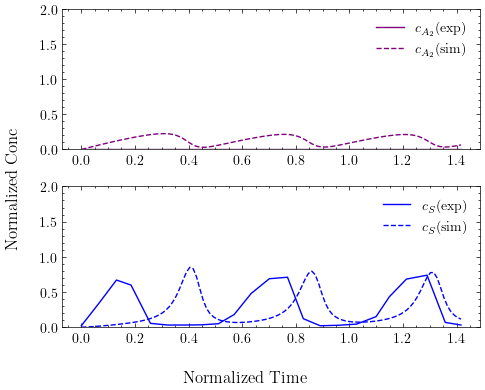

In [37]:
rates = [2311.4  ,  914.9  ,   16.002,  370.02 , 1e4, 1e4]
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 14
lam, m = 0.11, 2
td1, td2 = 0.02, 0.02

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_100 = delayed_oscillation(delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_100.add_exp_data(df_MH_Chem_fig2a_100)
delayed_model_100.set_init_cond([0, 0, 0, 0])
fig100, axes100 = delayed_model_100.plot(ylim=2, t=3, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0. 0.]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


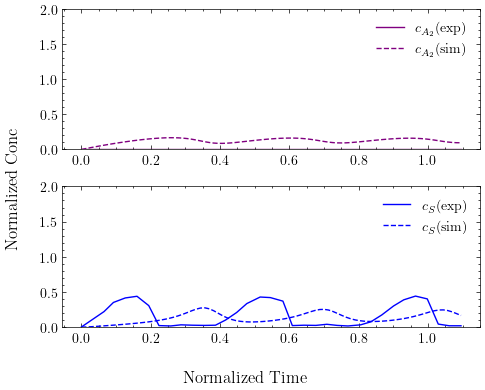

In [42]:
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 7
lam, m = 0.11, 2
td1, td2 = 0.02/2, 0.02/2

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_50 = delayed_oscillation(delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_50.add_exp_data(df_MH_Chem_fig2a_50)
delayed_model_50.set_init_cond([0, 0, 0, 0])
fig50, axes50 = delayed_model_50.plot(ylim=2, t=3, exp=True)

The species are ['$c_{A_2}$', '$c_S$', '$c_A$', '$c_O$']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.         0.03450656]
Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.


clang: warning: argument '-Ofast' is deprecated; use '-O3 -ffast-math' for the same behavior, or '-O3' to enable only conforming optimizations [-Wdeprecated-ofast]
ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


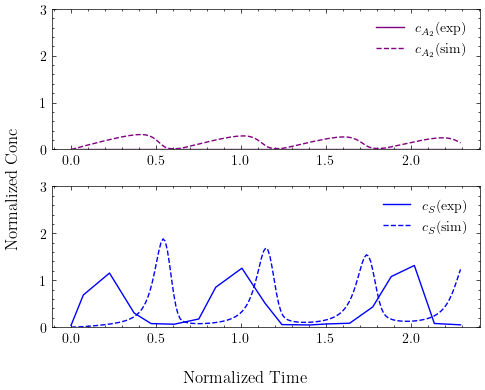

In [47]:
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 28
lam, m = 0.11, 2
td1, td2 = 0.02*2, 0.02*2

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_200 = delayed_oscillation(delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_200.add_exp_data(df_MH_Chem_fig2a_200)
delayed_model_200.set_init_cond([0, 0, 0, 0])
fig200, axes200 = delayed_model_200.plot(ylim=3, t=3, exp=True)

In [203]:
tau = 14.5/14
cS100_exp = axes100[1].lines[0].get_ydata() * CMC_3a
cS100_sim = axes100[1].lines[1].get_ydata() * CMC_3a
t100_exp = axes100[1].lines[0].get_xdata() * tau
t100_sim = axes100[1].lines[1].get_xdata() * tau

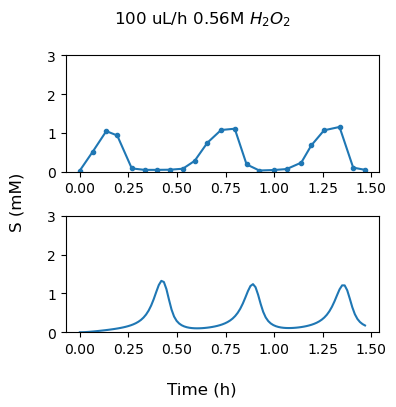

In [576]:
fig, ax = plt.subplots(2, 1, figsize=(4,4))
ax[0].plot(t100_exp, cS100_exp, marker='.')
ax[1].plot(t100_sim, cS100_sim)

for a in ax:
    a.set_ylim([0, 3])

fig.supxlabel('Time (h)')
fig.supylabel('S (mM)')
fig.suptitle('100 uL/h 0.56M $H_2O_2$')

plt.tight_layout()
fig.savefig(r'.\figs\100_est.png', dpi=300)

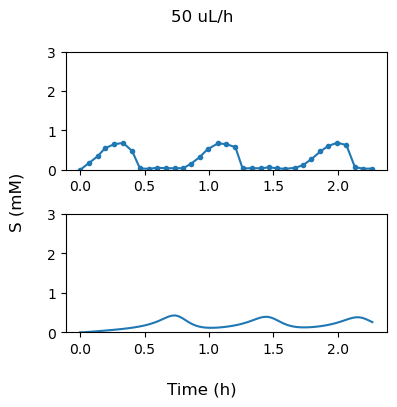

In [573]:
tau = 14.5/7
cS50_exp = axes50[1].lines[0].get_ydata() * CMC_3a
cS50_sim = axes50[1].lines[1].get_ydata() * CMC_3a
t50_exp = axes50[1].lines[0].get_xdata() * tau
t50_sim = axes50[1].lines[1].get_xdata() * tau

fig, ax = plt.subplots(2, 1, figsize=(4,4))
ax[0].plot(t50_exp, cS50_exp, marker='.')
ax[1].plot(t50_sim, cS50_sim)

for a in ax:
    a.set_ylim([0, 3])

fig.supxlabel('Time (h)')
fig.supylabel('S (mM)')

fig.suptitle('50 uL/h')

plt.tight_layout()
fig.savefig(r'.\figs\50_pre.png', dpi=300)

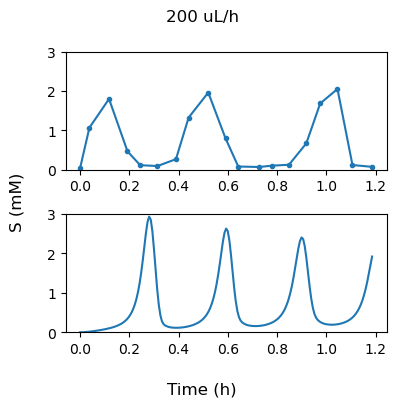

In [574]:
tau = 14.5/28
cS200_exp = axes200[1].lines[0].get_ydata() * CMC_3a
cS200_sim = axes200[1].lines[1].get_ydata() * CMC_3a
t200_exp = axes200[1].lines[0].get_xdata() * tau
t200_sim = axes200[1].lines[1].get_xdata() * tau

fig, ax = plt.subplots(2, 1, figsize=(4,4))
ax[0].plot(t200_exp, cS200_exp, marker='.')
ax[1].plot(t200_sim, cS200_sim)

for a in ax:
    a.set_ylim([0, 3])

fig.supxlabel('Time (h)')
fig.supylabel('S (mM)')

fig.suptitle('200 uL/h')

plt.tight_layout()
fig.savefig(r'.\figs\200_pre.png', dpi=300)

Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


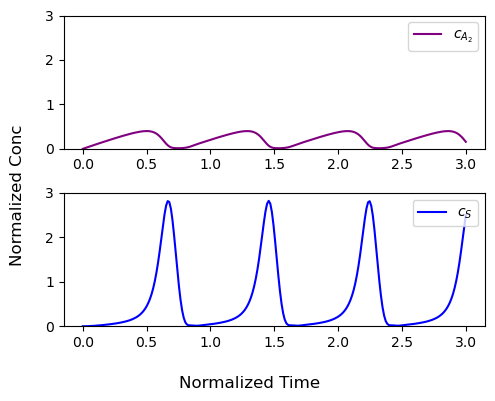

In [514]:
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 42
lam, m = 0.11, 2
td1, td2 = 0.02*3, 0.02*3

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_300 = delayed_oscillation(delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_300.set_init_cond([0, 0, 0, 0])
fig300, axes300 = delayed_model_300.plot(t=3, ylim=3)

Initial condition is set as [0, 0, 0, 0]
Generating, compiling, and loading C code.
Using default integration parameters.


c:\Users\chem-sedm6967\OneDrive - Nexus365\Desktop\01_projects\01_oscillation modelling\Chemical_Oscillation_Model\osc_toolkit.py:285: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])


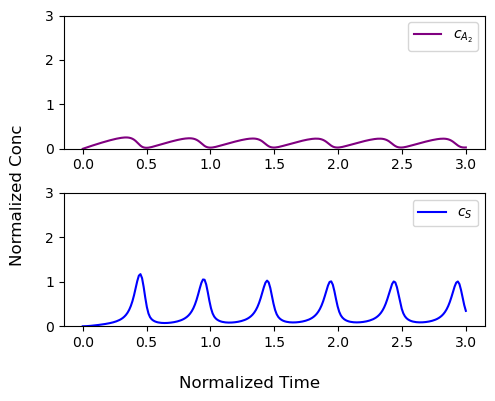

In [216]:
rs_ac, rds_ac, rs, rds, ro, rm = rates
rext = 18.2
lam, m = 0.11, 2
td1, td2 = 0.02*1.3, 0.02*1.3

#Definition of the model
alpha, beta, theta, phi, ep, delta = rs_ac / rext, rds_ac / rext, rs / rext, rds / rext, ro / rext, rm / rext
params = np.array([alpha, beta, theta, phi, ep, delta])
consts = np.array([lam, m])
delay = np.array([td1, td2])
init_cond = np.array([0, 0, 0, 0])
delayed_model_130 = delayed_oscillation(delayed_full_4vars, delay, params, consts, init_cond)
delayed_model_130.set_init_cond([0, 0, 0, 0])
fig130, axes130 = delayed_model_130.plot(t=3, ylim=3)

In [507]:
tau1 = 14.5/18.2
tau2 = 14.5/42

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0, 0, 0, 0]


c:\Users\chem-sedm6967\AppData\Local\anaconda3\envs\jitcdde_clean_env\lib\site-packages\jitcdde\_jitcdde.py:324: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  self.past.constant(state,time)
c:\Users\chem-sedm6967\OneDrive - Nexus365\Desktop\01_projects\01_oscillation modelling\Chemical_Oscillation_Model\osc_toolkit.py:285: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])


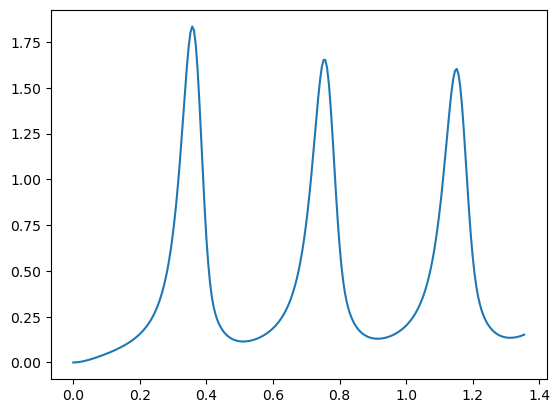

In [554]:
delayed_model_130.set_init_cond([0, 0, 0, 0])
delayed_model_300.set_init_cond([0, 0, 0, 0])
sol1, t1 = delayed_model_130.simulate(t=1.7, acc=150)

t_O = t1*tau1
c_O = delayed_full_4vars['calc_all'](sol1, delayed_model_130._consts)
cS_O = c_O[1] * CMC_3a

plt.plot(t_O, cS_O)

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0.16891287 0.08023449 0.60445408 0.00589725]
Initial condition is set as [0.17260307 0.11049637 0.60761726 0.01115497]


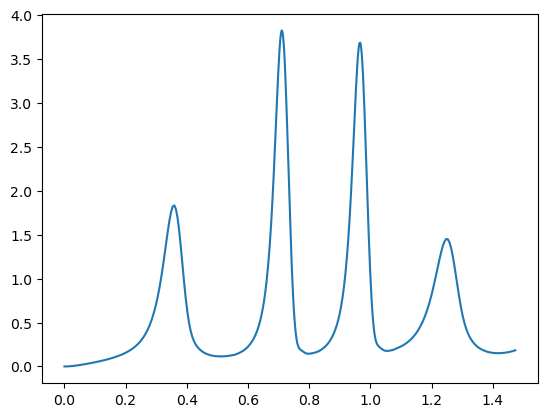

In [552]:
delayed_model_130.set_init_cond([0,0,0,0])
sol2, t2 = delayed_model_130.simulate(t=0.7, acc=150)
delayed_model_300.set_init_cond(sol2[-1])
sol3, t3 = delayed_model_300.simulate(t=1.5, acc=150)
delayed_model_130.set_init_cond(sol3[-1])
sol4, t4 = delayed_model_130.simulate(t=0.5, acc=150)

t_X = np.concatenate((t2*tau1, t3*tau2 + t2[-1]*tau1, t4*tau1 + t3[-1]*tau2 + t2[-1]*tau1))
sol_X = np.concatenate((sol2, sol3, sol4))
c_X = delayed_full_4vars['calc_all'](sol_X, delayed_model_130._consts)
cS_X = c_X[1] * CMC_3a

plt.plot(t_X, cS_X)

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [1.21408789e-01 1.54157935e-02 5.68162340e-01 2.49459010e-04]
Initial condition is set as [0.11080007 0.06759069 0.56426739 0.00414445]


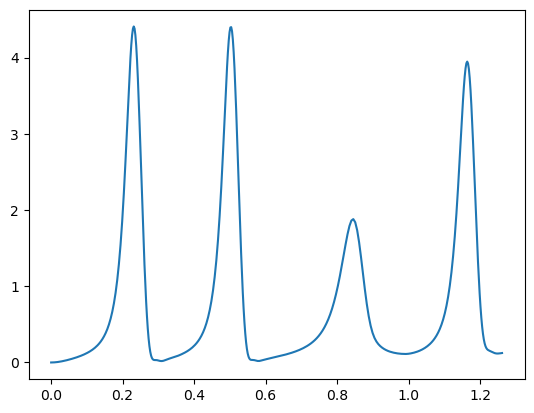

In [516]:
delayed_model_300.set_init_cond([0,0,0,0])
sol5, t5 = delayed_model_300.simulate(t=1.7, acc=150)
delayed_model_130.set_init_cond(sol5[-1])
sol6, t6 = delayed_model_130.simulate(t=0.5, acc=150)
delayed_model_300.set_init_cond(sol6[-1])
sol7, t7 = delayed_model_300.simulate(t=0.8, acc=150)

t_F = np.concatenate((t5*tau2, t6*tau1 + t5[-1]*tau2, t7*tau2 + t6[-1]*tau1 + t5[-1]*tau2))
sol_F = np.concatenate((sol5, sol6, sol7))
c_F = delayed_full_4vars['calc_all'](sol_F, delayed_model_130._consts)
cS_F = c_F[1] * CMC_3a

plt.plot(t_F, cS_F)

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [ 0.02137544  0.13634534  0.5141766  -0.02636995]
Initial condition is set as [0.18712826 0.09515501 0.6188182  0.0082995 ]


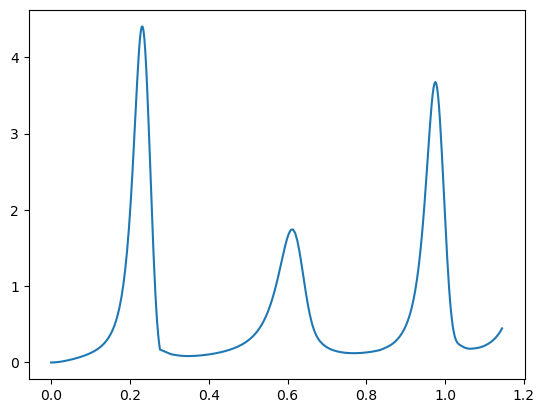

In [532]:
delayed_model_300.set_init_cond([0,0,0,0])
sol8, t8 = delayed_model_300.simulate(t=0.8, acc=150)

delayed_model_130.set_init_cond(sol8[-1])
sol9, t9 = delayed_model_130.simulate(t=0.7, acc=150)

delayed_model_300.set_init_cond(sol9[-1])
sol10, t10 = delayed_model_300.simulate(t=0.9, acc=150)

t_R = np.concatenate((t8*tau2, t9*tau1 + t8[-1]*tau2, t10*tau2 + t9[-1]*tau1 + t8[-1]*tau2))
sol_R = np.concatenate((sol8, sol9, sol10))
c_R = delayed_full_4vars['calc_all'](sol_R, delayed_model_130._consts)
cS_R = c_R[1] * CMC_3a

plt.plot(t_R, cS_R)

Initial condition is set as [0, 0, 0, 0]
Initial condition is set as [0.16891286 0.08023453 0.60445756 0.00589722]


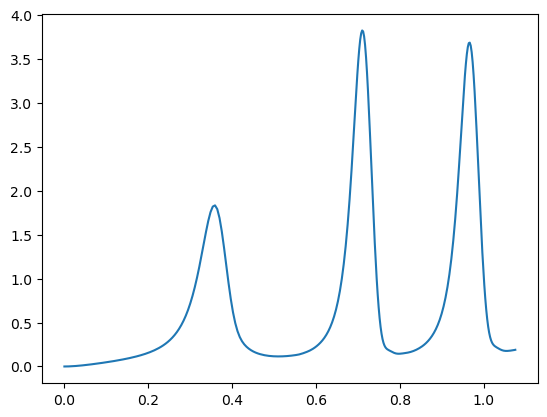

In [539]:
delayed_model_130.set_init_cond([0,0,0,0])
sol11, t11 = delayed_model_130.simulate(t=0.7, acc=150)

delayed_model_300.set_init_cond(sol11[-1])
sol12, t12 = delayed_model_300.simulate(t=1.5, acc=150)

t_D = np.concatenate((t11*tau1, t12*tau2 + t11[-1]*tau1))
sol_D = np.concatenate((sol11, sol12))
c_D = delayed_full_4vars['calc_all'](sol_D, delayed_model_130._consts)
cS_D = c_D[1] * CMC_3a

plt.plot(t_D, cS_D)

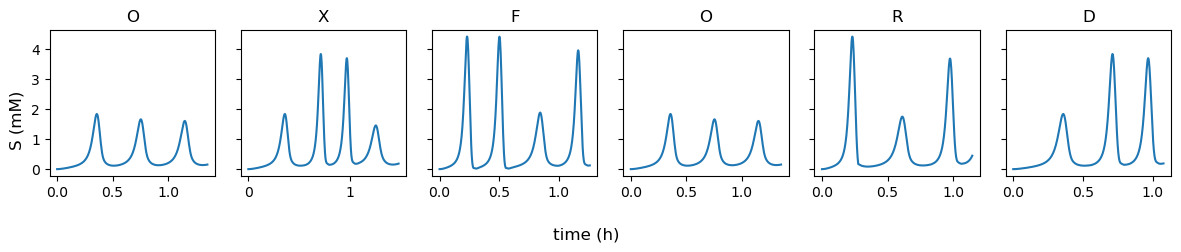

In [575]:
fig, ax = plt.subplots(1, 6, figsize=(12, 2.5), sharey=True)

xlist = [t_O, t_X, t_F, t_O, t_R, t_D]
ylist = [cS_O, cS_X, cS_F, cS_O, cS_R, cS_D]
title_list = ['O', 'X', 'F', 'O', 'R', 'D']

for i in range(len(xlist)):
    ax[i].plot(xlist[i], ylist[i])
    ax[i].set_title(title_list[i])

fig.supxlabel('time (h)')
fig.supylabel('S (mM)')

plt.tight_layout()

plt.tight_layout()
fig.savefig(r'.\figs\oxford.png', dpi=300)